<a href="https://colab.research.google.com/github/anurag161/Dogs_Vs_Cats_CNN/blob/main/Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os

IMAGE SPECIFICATIONS

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

DATA FETCHING

In [ ]:
filenames=os.listdir(r"D:\ml\ML_portfolio_project\dogs-vs-cats\train\train")
print(filenames)
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [ ]:
df

filename  category
0         cat.0.jpg         0
1         cat.1.jpg         0
2        cat.10.jpg         0
3       cat.100.jpg         0
4      cat.1000.jpg         0
...             ...       ...
24995  dog.9995.jpg         1
24996  dog.9996.jpg         1
24997  dog.9997.jpg         1
24998  dog.9998.jpg         1
24999  dog.9999.jpg         1

[25000 rows x 2 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  25000 non-null  object
 1   category  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.describe()

category
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000

In [ ]:
df.isnull().sum()

filename    0
category    0
dtype: int64

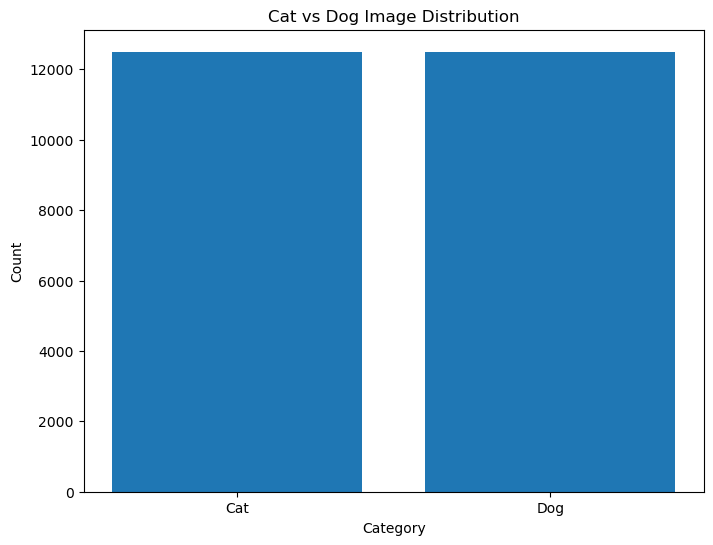

In [ ]:
category_counts = df['category'].value_counts()

# Create a bar plot to visualize the category distribution
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xticks([0, 1], ['Cat', 'Dog'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Cat vs Dog Image Distribution')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df, validate_df = train_test_split(df, test_size=0.1, random_state=42)


train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [ ]:
test_filenames = os.listdir(r"D:\ml\ML_portfolio_project\dogs-vs-cats\test1\test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 r"D:\ml\ML_portfolio_project\dogs-vs-cats\train\train",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    r"D:\ml\ML_portfolio_project\dogs-vs-cats\train\train",
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_dataframe(test_df,
r"D:\ml\ML_portfolio_project\dogs-vs-cats\test1\test1",x_col="filename",y_col=None,
target_size=Image_Size,
class_mode=None,
batch_size=batch_size
)

Found 12500 validated image filenames.


In [ ]:
print(test_generator)

In [ ]:
epochs=5
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\anura\AppData\Local\Temp\ipykernel_14920\1096949241.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
1500/1500 [==============================] - 732s 487ms/step - loss: 0.7258 - accuracy: 0.6374 - val_loss: 0.5510 - val_accuracy: 0.7233 - lr: 0.0010
Epoch 2/5
1500/1500 [==============================] - 809s 539ms/step - loss: 0.5538 - accuracy: 0.7239 - val_loss: 0.5009 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 3/5
1500/1500 [==============================] - 770s 513ms/step - loss: 0.4942 - accuracy: 0.7632 - val_loss: 0.7315 - val_accuracy: 0.7181 - lr: 0.0010
Epoch 4/5
1500/1500 [==============================] - 670s 446ms/step - loss: 0.4630 - accuracy: 0.7834 - val_loss: 0.6490 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 5/5
1500/1500 [==============================] - 655s 436ms/step - loss: 0.4298 - accuracy: 0.8064 - val_loss: 0.3466 - val_accuracy: 0.8522 - lr: 0.0010


In [ ]:
model.save("model1_catsVSdogs_10epoch.h5")

In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

834/834 [==============================] - 172s 206ms/step


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

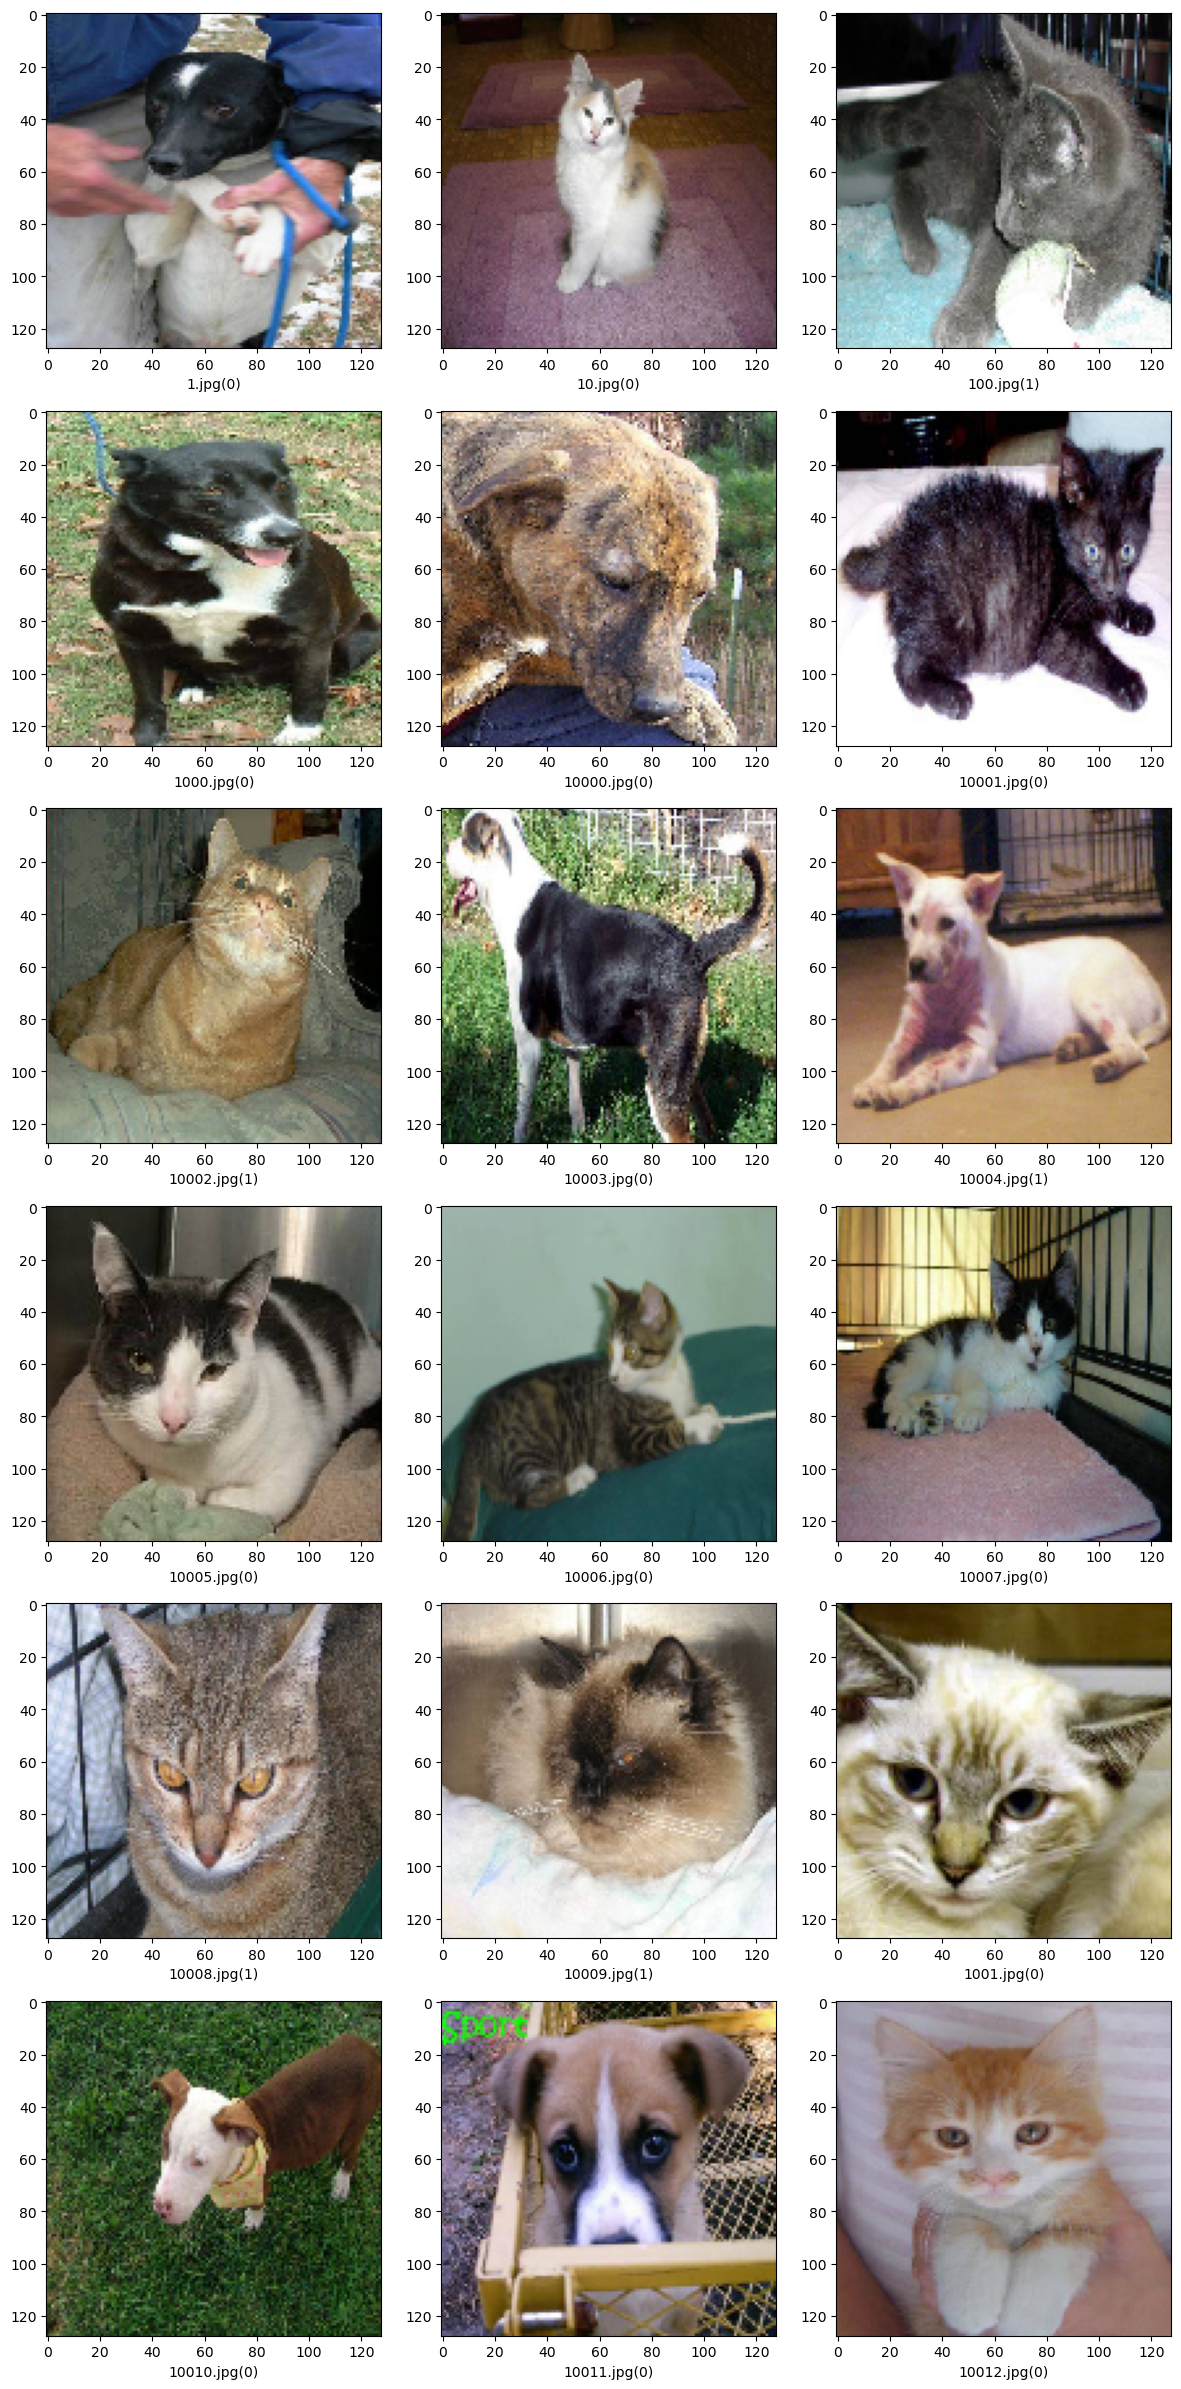

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"D:\ml\ML_portfolio_project\dogs-vs-cats\test1\test1\\"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
results = {
    0: 'cat',
    1: 'dog'
}

from PIL import Image
import numpy as np

im = Image.open(r"D:\ml\ML_portfolio_project\dogs-vs-cats\test1\test1\1.jpg")
im = im.resize(Image_Size)
im = np.expand_dims(im, axis=0)
im = np.array(im)
im = im / 255

pred_probabilities = model.predict(im)
pred = np.argmax(pred_probabilities, axis=1)[0]
print(pred, results[pred])


1/1 [==============================] - 0s 38ms/step
1 dog


In [ ]:
print(pred)

1


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_true = test_df['category'].to_numpy()
y_pred = test_df['category'].replace({'dog': 1, 'cat': 0}).to_numpy()

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 100.0
